# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

### Assignments 1: 
#### Find `Most Common Words` and create word cloud.

#### Read in the document-term matrix

In [1]:
import pandas as pd
dtm_df = pd.read_pickle('dtm.pkl')
dtm_df

,aah,aalways,aand,abacus,abacuswillys,abandon,abandoned,abandonedthats,abandonedwhatwhwhwhoawaitseriouslymombecome,abdicate,...,zeus,zeusi,zeuss,zone,zoneall,zonetried,zoo,zoobingalabut,zooquiet,zubkov
beekeeper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ferrari,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
icarus,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
napolean,0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
percy jackson,0,0,0,0,0,0,0,0,0,0,...,3,1,5,0,0,0,0,0,0,0
pulp fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
suzume,0,0,0,0,0,0,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0
the old oak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
true detective,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wonka,0,0,0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,0


#### Find  and print the top 30 words said in each movie


In [2]:
top_words = dtm_df.sum().sort_values(ascending=False).head(30)
print(top_words)

dont         310
just         305
know         304
like         256
im           242
got          186
fucking      186
youre        184
right        182
come         170
want         164
thats        151
good         138
did          135
think        130
need         129
gonna        126
going        124
chocolate    111
tell         108
hes           99
make          98
music         98
little        97
say           97
time          92
look          91
theres        90
thank         90
mr            87
dtype: int64


#### By looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that. Look at the most common top words and add them to the stop word list.



In [3]:
stop_words=['just','got','thats','theres']

#### Let's aggregate this list and identify the most common words along with how many routines they occur in


In [4]:
combined_stop_words = list(set(stop_words).union(top_words.index))

# Filter the document-term matrix to include only the relevant words
filtered_dtm = dtm_df[combined_stop_words]

# Count the occurrences of each word in the filtered DTM
word_occurrences = filtered_dtm.sum()

# Display the most common words and their occurrences
print("\nMost Common Words and Their Occurrences:")
print(word_occurrences)


Most Common Words and Their Occurrences:
think        130
chocolate    111
hes           99
youre        184
right        182
tell         108
know         304
fucking      186
like         256
did          135
dont         310
gonna        126
time          92
good         138
just         305
thats        151
come         170
theres        90
look          91
make          98
music         98
mr            87
want         164
say           97
going        124
thank         90
got          186
im           242
little        97
need         129
dtype: int64


#### If more than half of the movies have it as a top word, exclude it from the list


In [5]:
filtered_dtm = dtm_df[combined_stop_words]

# Exclude words that are top words in more than half of the routines
threshold = len(dtm_df) / 2
filtered_top_words = top_words[top_words.index.isin(filtered_dtm.columns) & (top_words > threshold)]

# Count the occurrences of each word in the filtered DTM
word_occurrences = filtered_dtm.sum()

# Display the most common words and their occurrences, excluding those in more than half of the routines
print("\nMost Common Words (Excluding Those in More Than Half of Routines) and Their Occurrences:")
print(word_occurrences[~word_occurrences.index.isin(filtered_top_words.index)])


Most Common Words (Excluding Those in More Than Half of Routines) and Their Occurrences:
Series([], dtype: int64)


In [6]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import pandas as pd

# Read in cleaned data from 'data_clean.pkl'
with open('data_clean.pkl', 'rb') as file:
    cleaned_data = pickle.load(file)
new_stop_words = ['theres', 'did']  # Add your new stop words here

# Combine new stop words with existing stop words
all_stop_words = list(text.ENGLISH_STOP_WORDS.union(new_stop_words))

# Assuming dtm_df is the original document-term matrix
# Recreate the document-term matrix with updated stop words
vectorizer = CountVectorizer(stop_words=all_stop_words)
dtm = vectorizer.fit_transform(cleaned_data['transcript'])

# Convert the DTM to a DataFrame
updated_dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Pickle the updated document-term matrix for later use
with open('updated_dtm.pkl', 'wb') as file:
    pickle.dump(updated_dtm_df, file)

In [22]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Define additional stop words
add_stop_words = ['list', 'of', 'additional', 'stop', 'words']

# Add new stop words to the existing English stop words
stop_words = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


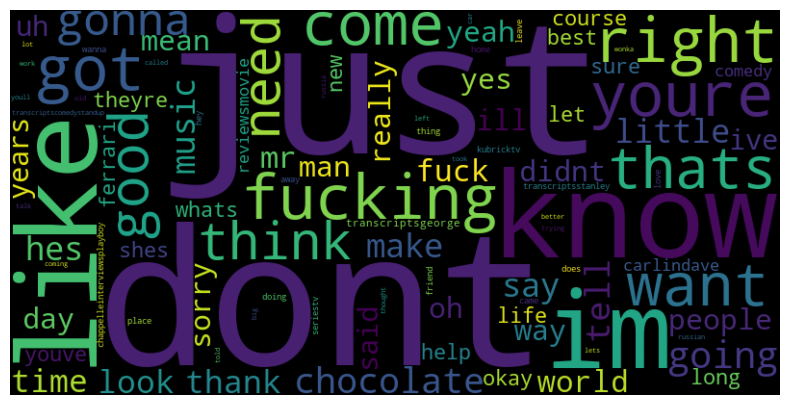

In [7]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
dtm_df = pd.read_pickle('updated_dtm.pkl')
word_frequencies = dtm_df.sum()
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black',random_state=42).generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

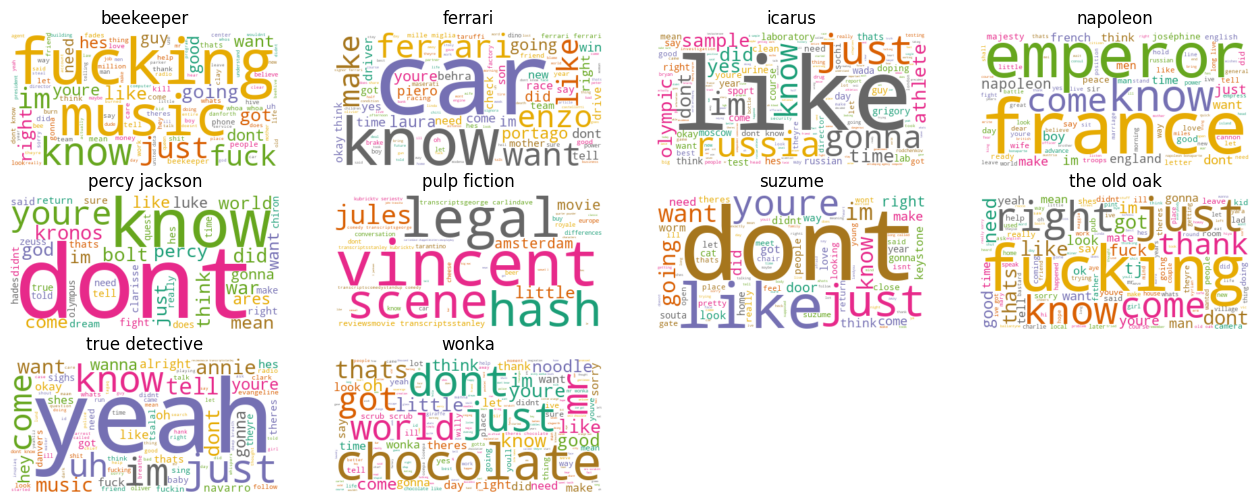

In [23]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

movies = ['beekeeper', 'ferrari', 'icarus', 'napoleon', 'percy jackson', 'pulp fiction', 'suzume', 'the old oak', 'true detective', 'wonka']
# Create subplots for each comedian
for index, movie in enumerate(data.columns):
    wc.generate(data_clean.transcript[movie])

    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movies[index])

plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/krishuppal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


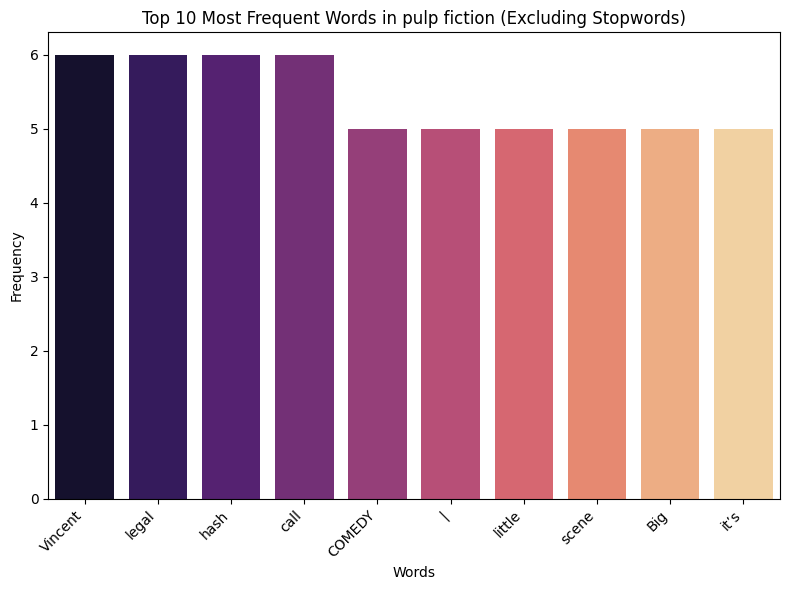

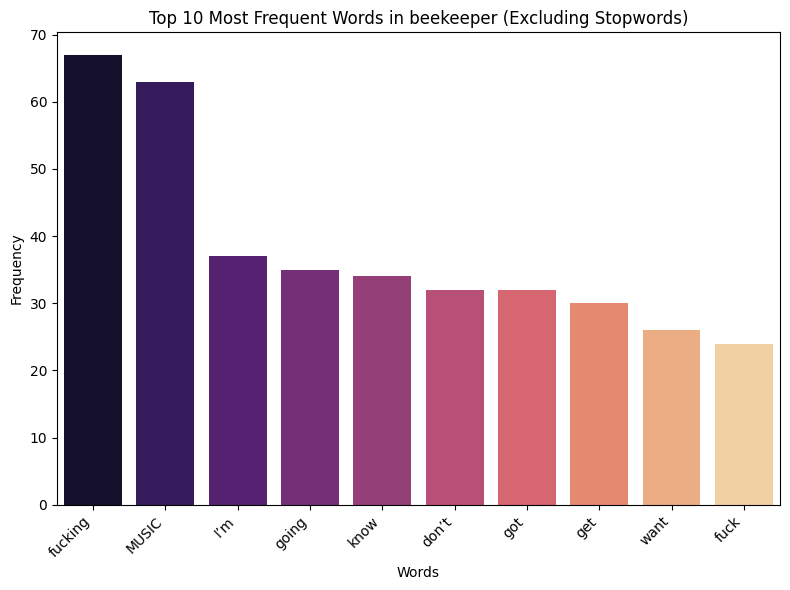

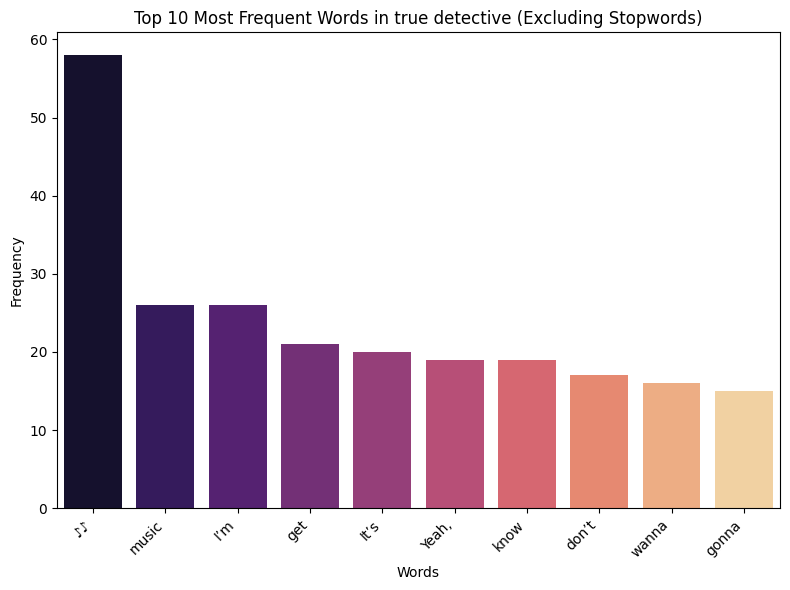

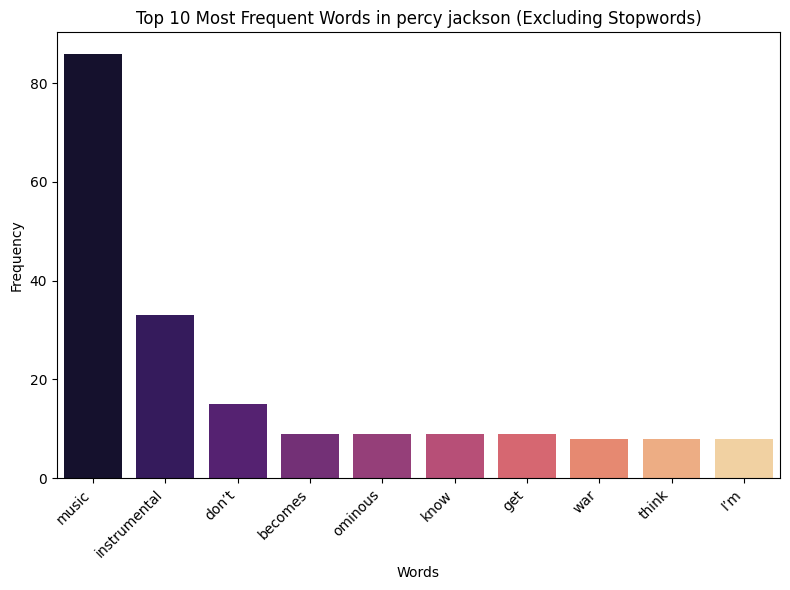

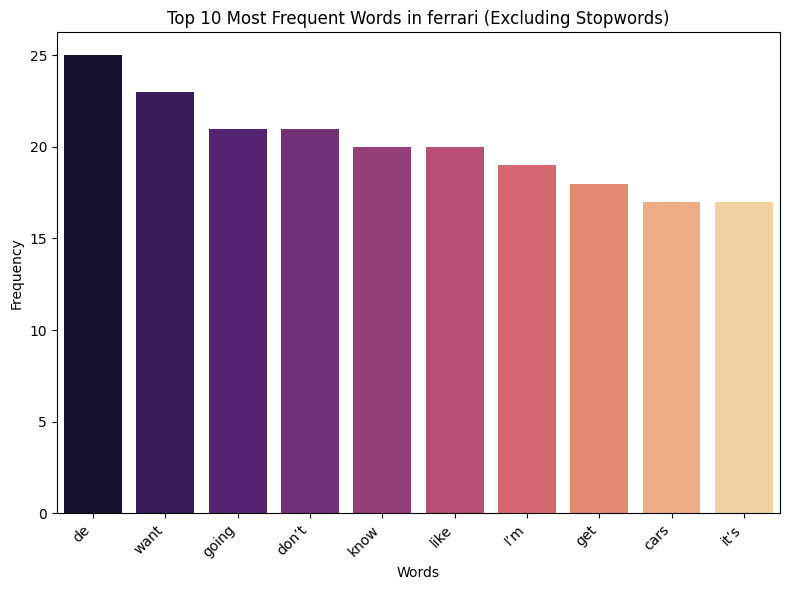

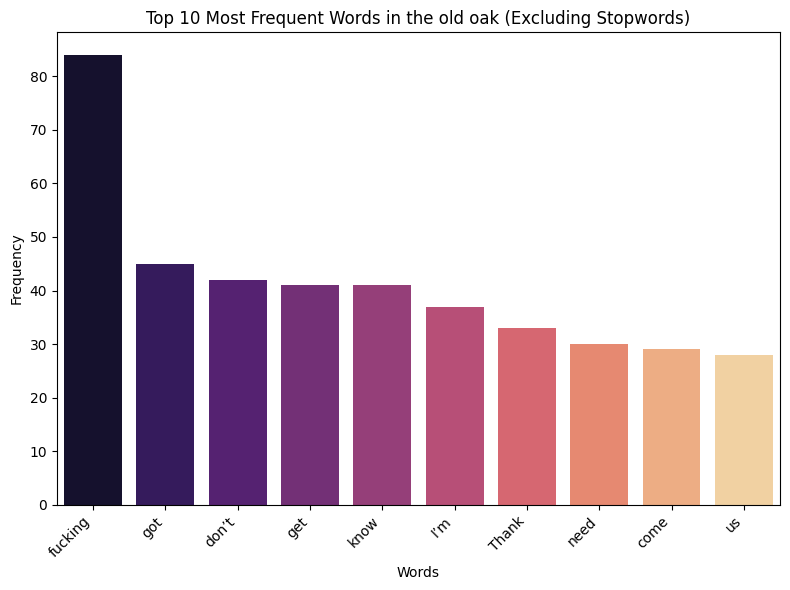

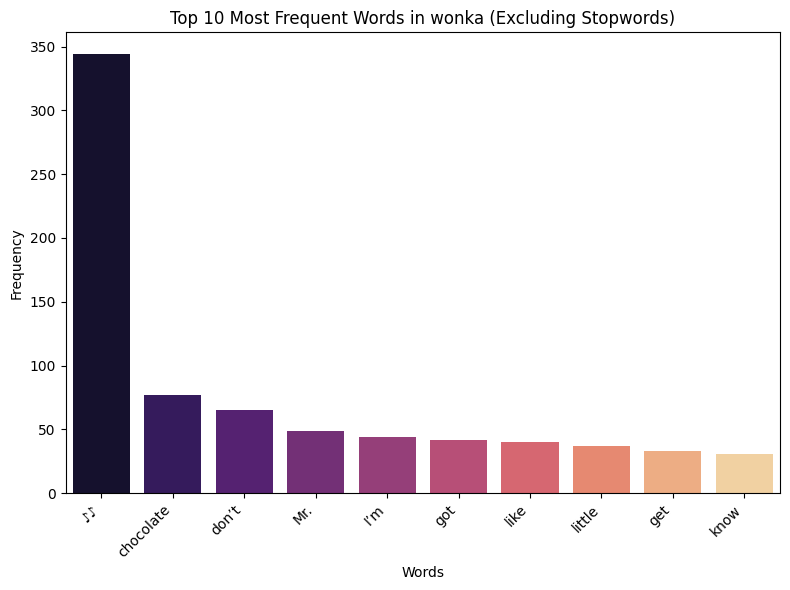

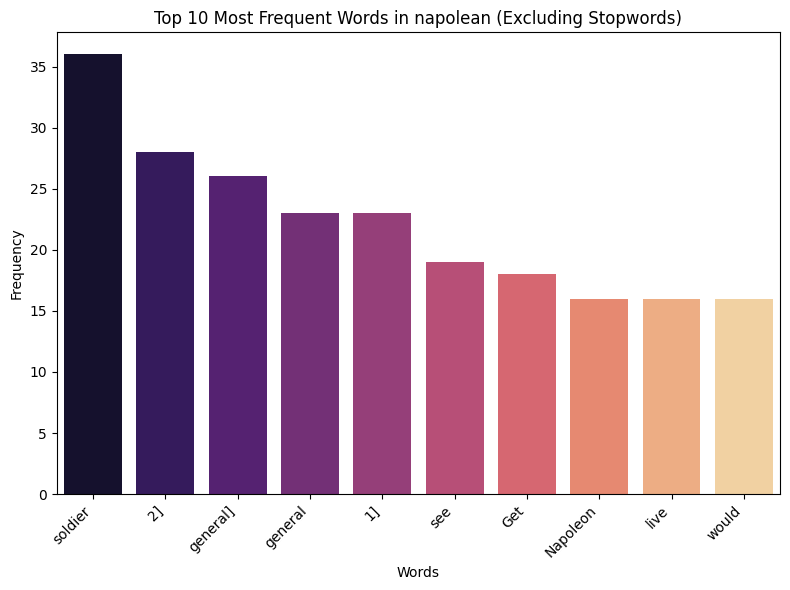

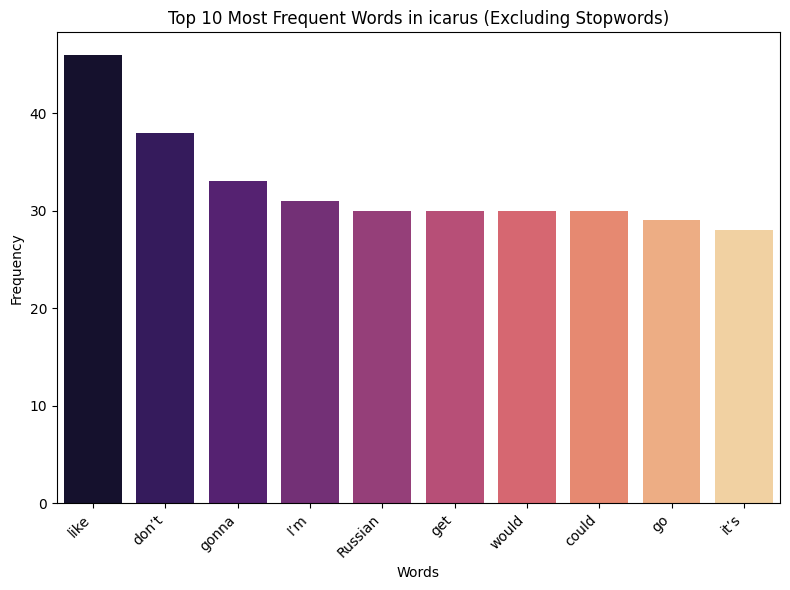

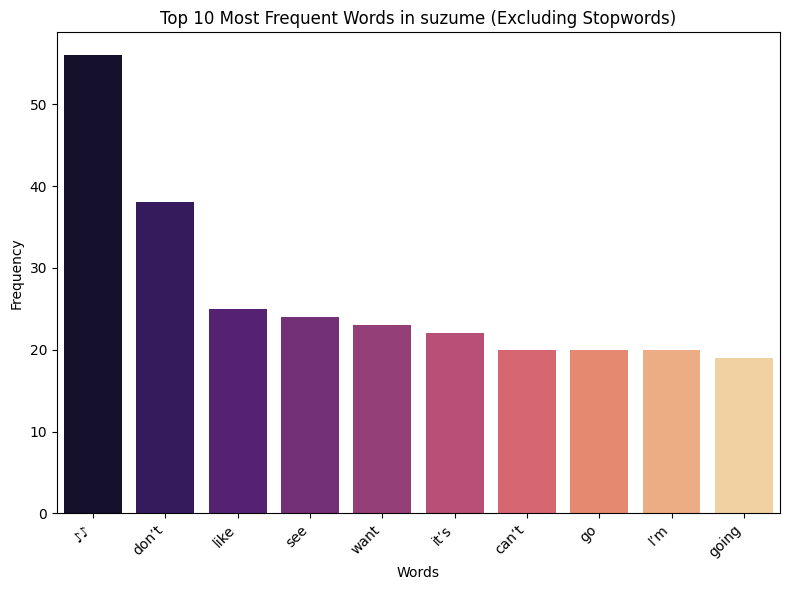

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import pickle
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

with open('data_combined.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Function to tokenize text, remove stopwords, and count word frequencies
def count_words(text):
    words = text.split()  # Tokenize text into words
    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]
    return Counter(words)  # Count word frequencies

# Function to get the most frequent words
def get_top_words(counter, n=10):
    return counter.most_common(n)  # Return the top N most frequent words

# Function to create a bar plot for a movie
def plot_movie_words(movie, top_n=10):
    if isinstance(loaded_data[movie], list):
        transcript = ' '.join(loaded_data[movie])  # Concatenate all strings in the list
    else:
        transcript = loaded_data[movie]
    word_counter = count_words(transcript)
    top_words = dict(get_top_words(word_counter, top_n))
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(top_words.keys()), y=list(top_words.values()), palette='magma')
    plt.title(f'Top {top_n} Most Frequent Words in {movie} (Excluding Stopwords)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Iterate through each movie and plot its word frequency data
for movie in loaded_data.keys():
    plot_movie_words(movie, top_n=10)  # Adjust top_n as needed



#### You observations
1. Beekeeper and Old Oak have the most swear words. These movies must be 16+.
2. Suzume, Wonka, Percy Jackson and True Detectice use the most music.
3. Words like "chocolate" in Wonka and "cars" in ferrari tell us what the movie is about.

### Assignment 2:
#### Find the number of unique words in movies.

In [9]:
import pandas as pd
movies = ['beekeeper', 'ferrari', 'icarus', 'napoleon', 'percy jackson', 'pulp fiction', 'suzume', 'the old oak', 'true detective', 'wonka']
updated_dtm_df.columns = ['movies'] + list(updated_dtm_df.columns[1:])
updated_dtm_df['movies'] = movies
print(updated_dtm_df)

           movies  aalways  aand  abacus  abacuswillys  abandon  abandoned  \
0       beekeeper        0     0       0             0        0          0   
1         ferrari        0     0       0             0        0          0   
2          icarus        0     0       0             0        0          1   
3        napoleon        1     1       0             0        1          1   
4   percy jackson        0     0       0             0        0          0   
5    pulp fiction        0     0       0             0        0          0   
6          suzume        0     0       0             0        0          2   
7     the old oak        0     0       0             0        0          0   
8  true detective        0     0       0             0        0          0   
9           wonka        0     0       4             1        0          0   

   abandonedthats  abandonedwhatwhwhwhoawaitseriouslymombecome  abdicate  ...  \
0               0                                           

In [10]:
# Calculate the number of unique words each comedian uses
unique_words_per_comedian = (updated_dtm_df != 0).sum(axis=1)

# Print the unique word count for each comedian
print(unique_words_per_comedian)

cleaned_data['UniqueWordsCount'] = unique_words_per_comedian

0    2826
1    1952
2    2869
3    2227
4     854
5     401
6    2373
7    2422
8    1575
9    2881
dtype: int64


In [11]:
run_times = {'beekeeper': 105, 'ferrari': 131, 'icarus': 120, 'napolean': 158, 'percy jackson': 35,
             'pulp fiction': 154, 'suzume': 122, 'the old oak': 90, 'true detective': 60, 'wonka': 116}

# Calculate the total number of words for each movie
total_words = word_counts.values()

# Add columns to the cleaned_data DataFrame
cleaned_data['total_words'] = total_words
cleaned_data['run_times'] = pd.Series(run_times)

# Calculate words per minute
cleaned_data['words_per_minute'] = cleaned_data['total_words'] / cleaned_data['run_times']

# Sort the DataFrame by words per minute
cleaned_data_sorted = cleaned_data.sort_values(by='words_per_minute')
print(cleaned_data_sorted)



NameError: name 'word_counts' is not defined

In [12]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(10, 6))


plt.bar(cleaned_data_sorted['movies'], cleaned_data_sorted['words_per_minute'], color='skyblue')

plt.xlabel('Movie')
plt.ylabel('Words per Minute')
plt.title('Words per Minute for Each Movie')

plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


NameError: name 'cleaned_data_sorted' is not defined

<Figure size 1000x600 with 0 Axes>

#### Write your findings:
* **Vocabulary**
   * Percy Jackson and Pulp Fiction have lower vocabulary as lesser amount of unique words are spoken
   * Still total number of words of pulp fiction and suzume is the most. This implies that pupl fiction has most repetetive words.


* **Talking Speed**
   * Percy Jackson(mythical adventure) has the fastest talking speed with 200+ words spoken in a minute.
   * Beekeeper(action thriller) has the slowest talking speed with an average of 10 words in a minute
   

### Assignment 3: 
#### Check the profanity by analysing the common bad words, like `fucking`, `fuck`, `shit etc.

In [13]:
# take a look at the most common words.
profanity_words = ['fucking', 'fuck', 'shit', 'ass', 'bitch', 'damn', 'hell']

# Sum the occurrences of profanity words in each document
profanity_counts = dtm_df[profanity_words].sum(axis=1)

# Identify documents containing profanity
documents_with_profanity = dtm_df[profanity_counts > 0]
print("Documents containing profanity:")
print(documents_with_profanity)

Documents containing profanity:
   aah  aalways  aand  abacus  abacuswillys  abandon  abandoned  \
0    0        0     0       0             0        0          0   
1    0        0     0       0             0        0          0   
2    0        0     0       0             0        0          1   
3    0        1     1       0             0        1          1   
4    0        0     0       0             0        0          0   
5    0        0     0       0             0        0          0   
7    0        0     0       0             0        0          0   
8    3        0     0       0             0        0          0   
9    0        0     0       4             1        0          0   

   abandonedthats  abandonedwhatwhwhwhoawaitseriouslymombecome  abdicate  ...  \
0               0                                            0         0  ...   
1               0                                            0         0  ...   
2               0                                     

In [14]:
# isolate just these bad words
# Assuming dtm_df is the document-term matrix

# List of specific profanity words
specific_profanity_words = ['fucking', 'fuck', 'shit', 'ass', 'bitch', 'damn', 'hell']

# Create a new DataFrame containing only the specified profanity words
isolated_profanity_df = dtm_df[specific_profanity_words]

# Display the DataFrame with occurrences of specific profanity words
print(isolated_profanity_df)

   fucking  fuck  shit  ass  bitch  damn  hell
0       70    34     9    2      1     1     3
1        4     5     2    2      0     3     6
2        3     3     3    3      0     0     0
3        3     2     1    0      0     0     0
4        0     0     0    0      0     0     2
5        0     1     1    0      0     0     0
6        0     0     0    0      0     0     0
7       98    24     5    0      0     0     4
8        8    14     7    0      3     1     3
9        0     0     0    0      0     0     1


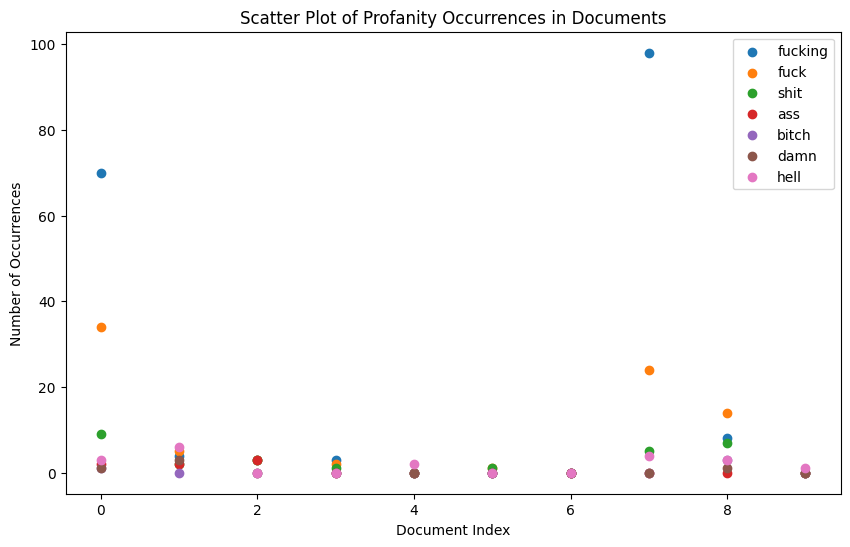

In [15]:
# create a scatter plot of your findings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for word in isolated_profanity_df.columns:
    plt.scatter(isolated_profanity_df.index, isolated_profanity_df[word], label=word)
plt.title('Scatter Plot of Profanity Occurrences in Documents')
plt.xlabel('Document Index')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()

### Write your findings. 
#### For example:
* **Averaging 2 F-Bombs Per Minute!** - Beekeeper has the highest frequency of F-Bombs.
* **Clean Dialogues** - The Old Oak clearly stands out to be the cleanest movie of all.

### Assignment 4:(optional)
What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [16]:
movies = ['beekeeper', 'ferrari', 'icarus', 'napoleon', 'percy jackson', 'pulp fiction', 'suzume', 'the old oak', 'true detective', 'wonka']
dtm_df['movies'] = movies
print(dtm_df)

   aah  aalways  aand  abacus  abacuswillys  abandon  abandoned  \
0    0        0     0       0             0        0          0   
1    0        0     0       0             0        0          0   
2    0        0     0       0             0        0          1   
3    0        1     1       0             0        1          1   
4    0        0     0       0             0        0          0   
5    0        0     0       0             0        0          0   
6    0        0     0       0             0        0          2   
7    0        0     0       0             0        0          0   
8    3        0     0       0             0        0          0   
9    0        0     0       4             1        0          0   

   abandonedthats  abandonedwhatwhwhwhoawaitseriouslymombecome  abdicate  ...  \
0               0                                            0         0  ...   
1               0                                            0         0  ...   
2               0  

In [17]:
profanity_words = ['kill']
profanity_counts = dtm_df[profanity_words].sum(axis=1)
# Identify documents containing profanity
documents_with_profanity = dtm_df[profanity_counts > 0]
print("Documents containing profanity:")
print(documents_with_profanity)

Documents containing profanity:
   aah  aalways  aand  abacus  abacuswillys  abandon  abandoned  \
0    0        0     0       0             0        0          0   
1    0        0     0       0             0        0          0   
2    0        0     0       0             0        0          1   
3    0        1     1       0             0        1          1   
4    0        0     0       0             0        0          0   

   abandonedthats  abandonedwhatwhwhwhoawaitseriouslymombecome  abdicate  ...  \
0               0                                            0         0  ...   
1               0                                            0         0  ...   
2               0                                            0         0  ...   
3               0                                            0         1  ...   
4               0                                            0         0  ...   

   zeus  zeusi  zeuss  zone  zoneall  zonetried  zoo  zoobingalabut  zooquiet 

In [18]:
specific_profanity_words = ['kill']
isolated_profanity_df = dtm_df[specific_profanity_words]
print(isolated_profanity_df)

   kill
0    12
1     1
2     3
3     4
4     3
5     0
6     0
7     0
8     0
9     0


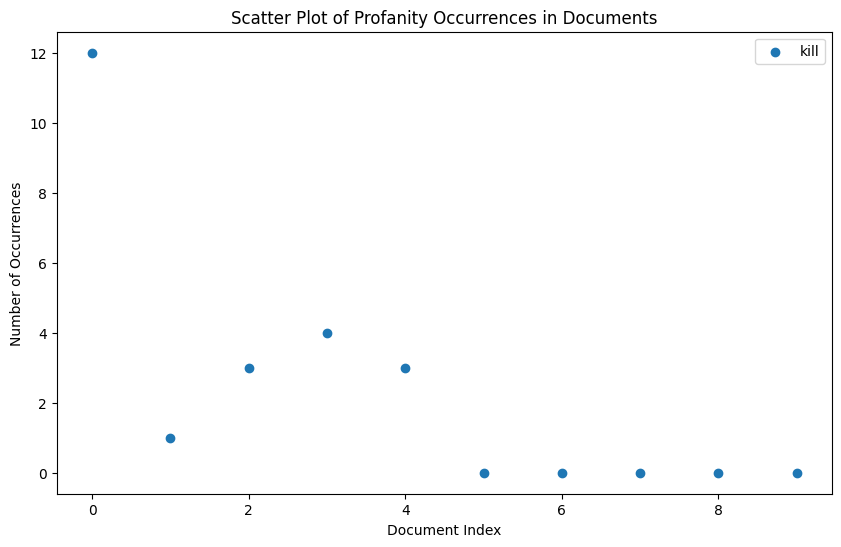

In [19]:
# create a scatter plot of your findings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for word in isolated_profanity_df.columns:
    plt.scatter(isolated_profanity_df.index, isolated_profanity_df[word], label=word)
plt.title('Scatter Plot of Profanity Occurrences in Documents')
plt.xlabel('Document Index')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()